## About the Project


In this project, we will do a project on the classification of sounds heard in cities using the “**UrbanSounds8K**” dataset. Our goal in this project is to prepare an artificial intelligence model using deep learning algorithms.
📌 We will download the dataset,

📌 create spectrograms from the audio files,

📌 save them to the computer according to the categories they belong to. 

📌 Then, we will prepare the CNN model by preprocessing these images and train this model.



(Model performance will not be a criterion during the evaluation phase. *The important thing is to prepare the model, train it and perform hyperparameter optimization*.)


### Importing the required libraries

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import cv2

### Importing spectrograms

In [129]:
from pathlib import Path
img_path = "/kaggle/temp/spectrograms/"

classes = ["air_conditioner","car_horn","children_playing","dog_bark","drilling","engine_idling",
           "gun_shot","jackhammer","siren","street_music"]

img_files_list=[]

for folder in range(0,10):
    for img_file in os.listdir(img_path + str(folder)):
        
        image = img_path+str(folder) + "/" + str(img_file)
        
        img_files_list.append([image, classes[int(folder)]])

#### Creating the labels

In [130]:
df=pd.DataFrame(img_files_list,columns=["img","label"])

labels = {'air_conditioner' : 0,'car_horn' : 1,'children_playing' : 2,'dog_bark' : 3,'drilling': 4,'engine_idling':5,'gun_shot':6,'jackhammer':7,'siren':8,'street_music':9,   }

df['label_code'] = df['label'].map(labels)

In [131]:
df['label'].value_counts()

air_conditioner     1000
children_playing    1000
dog_bark            1000
drilling            1000
engine_idling       1000
jackhammer          1000
street_music        1000
siren                929
car_horn             429
gun_shot             374
Name: label, dtype: int64

In [132]:
print(df.shape)

(8732, 3)


In [133]:
df.head()

,img,label,label_code
0,/kaggle/temp/spectrograms/0/100852-0-0-0.png,air_conditioner,0
1,/kaggle/temp/spectrograms/0/100852-0-0-1.png,air_conditioner,0
2,/kaggle/temp/spectrograms/0/100852-0-0-10.png,air_conditioner,0
3,/kaggle/temp/spectrograms/0/100852-0-0-11.png,air_conditioner,0
4,/kaggle/temp/spectrograms/0/100852-0-0-12.png,air_conditioner,0


In [134]:
X = []

shape = (37, 37)
for img in df["img"]:

    img = cv2.imread(str(img))

    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    img = cv2.resize(img, shape)
    
    img = img / 255
    
    X.append(img)

y = df["label_code"]

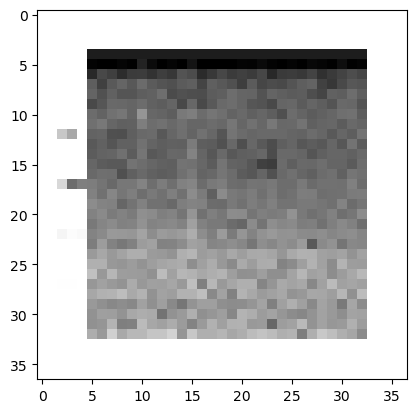

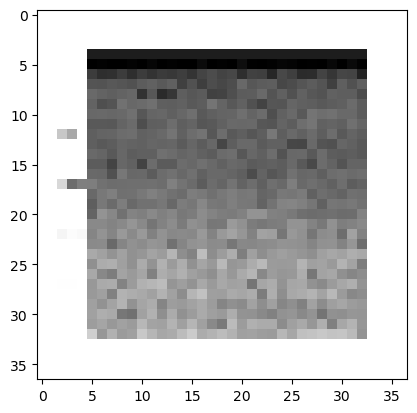

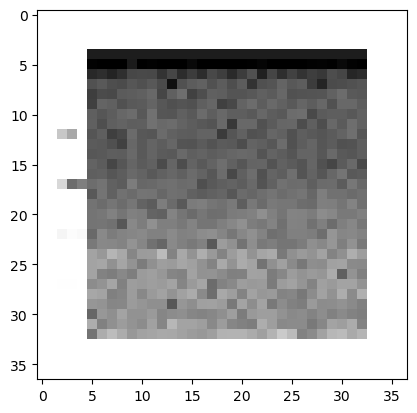

In [135]:
val = 0
for image in img_f:
    val += 1
    plt.imshow(image,cmap="gray")
    plt.show()
    cv2.waitKey()
    if val == 3:
        break

### Train Test Split

📌 We divide the data set into two blocks 

📌 From them we extract values of X and Y

In [136]:
from sklearn.model_selection import train_test_split

In [137]:
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val)

In [138]:
X_train = np.array(X_train)
X_test = np.array(X_test)
X_val = np.array(X_val)
y_train = np.array(y_train)
y_test = np.array(y_test)
y_val = np.array(y_val)

X_train = X_train.reshape(-1,37,37,1)
X_test = X_test.reshape(-1,37,37,1)
X_val = X_val.reshape(-1,37,37,1)
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
y_val = y_val.reshape(-1,)

In [139]:
print(f"X_train :{X_train.shape} X_test : {X_test.shape} X_val : {X_val.shape}")
print(f"y_train : {y_train.shape} y_test : {y_test.shape} y_val : {X_val.shape}")

X_train :(6549, 37, 37, 1) X_test : (1637, 37, 37, 1) X_val : (546, 37, 37, 1)
y_train : (6549,) y_test : (1637,) y_val : (546, 37, 37, 1)


### Creating a model

In [140]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.python.client import device_lib

We'll create our layers for our neural network model.

📌 **Softmax Function**: Used for multiple classification problems, produces outputs between (0,1) showing the probability that each given input belongs to a class.


📌**ReLU Function**: If the incoming input value is greater than 0, it is given as an unchanged output. It works like a sort of linear function.

In [141]:


model = tf.keras.Sequential()


model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), strides=(1,1), activation="relu", padding="same" input_shape=(37,37,1)))

model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), strides=(1,1), activation="relu", padding="same"))

model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), strides=(1,1), activation="relu", padding="same"))


model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(64, activation = "relu"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(64, activation = "relu"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation = "softmax"))


In [142]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 37, 37, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 18, 18, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 9, 9, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 9, 9, 32)          18464     
                                                                 
 flatten_1 (Flatten)         (None, 2592)             

📌 Compile the model

In [143]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

### Model Training

In [144]:
X_train = tf.stack(X_train)
y_train = tf.stack(y_train)
X_val = tf.stack(X_val)
y_val = tf.stack(y_val)

results = model.fit(X_train, y_train, batch_size=128, epochs=50, validation_data=(X_val,y_val))

Epoch 1/50
52/52 [==============================] - 7s 133ms/step - loss: 2.2539 - accuracy: 0.1388 - val_loss: 2.1364 - val_accuracy: 0.2326
Epoch 2/50
52/52 [==============================] - 7s 132ms/step - loss: 2.0988 - accuracy: 0.2109 - val_loss: 1.9211 - val_accuracy: 0.2656
Epoch 3/50
52/52 [==============================] - 7s 135ms/step - loss: 1.9995 - accuracy: 0.2449 - val_loss: 1.8514 - val_accuracy: 0.2802
Epoch 4/50
52/52 [==============================] - 7s 127ms/step - loss: 1.9175 - accuracy: 0.2698 - val_loss: 1.7664 - val_accuracy: 0.3388
Epoch 5/50
52/52 [==============================] - 6s 125ms/step - loss: 1.8652 - accuracy: 0.2921 - val_loss: 1.7035 - val_accuracy: 0.3388
Epoch 6/50
52/52 [==============================] - 7s 127ms/step - loss: 1.7842 - accuracy: 0.3185 - val_loss: 1.6403 - val_accuracy: 0.4121
Epoch 7/50
52/52 [==============================] - 6s 111ms/step - loss: 1.7138 - accuracy: 0.3523 - val_loss: 1.6014 - val_accuracy: 0.4194
Epoch 

### Model Evaluation

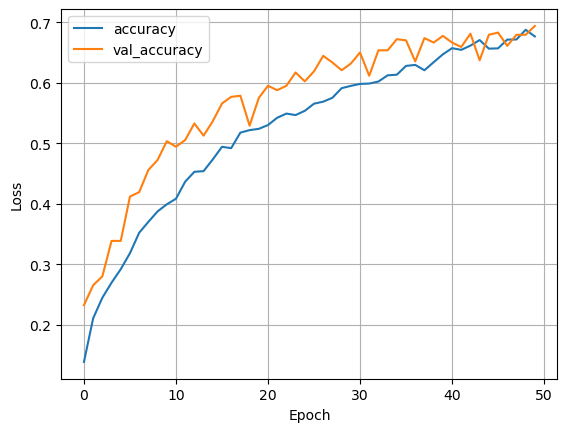

In [150]:
plt.plot(results.history["accuracy"], label="accuracy")

plt.plot(results.history["val_accuracy"], label="val_accuracy")

plt.xlabel("Epoch")

plt.ylabel("Loss")

plt.legend()

plt.grid(True)

plt.show()



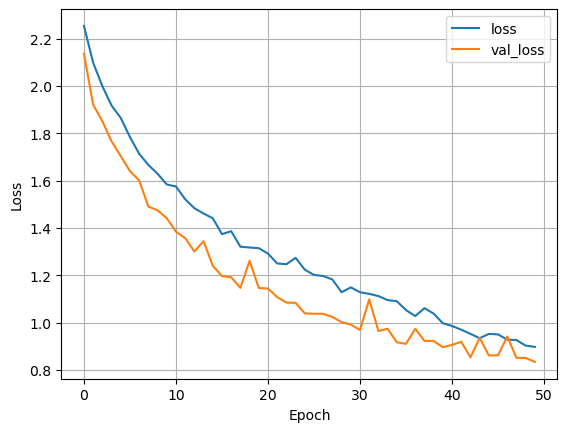

In [151]:

plt.plot(results.history['loss'], label='loss')


plt.plot(results.history['val_loss'], label='val_loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend()

plt.grid(True)

plt.show()

In [159]:
X_test=tf.stack(X_test)
y_test=tf.stack(y_test)
model.evaluate(X_test,y_test)

52/52 [==============================] - 1s 10ms/step - loss: 0.8529 - accuracy: 0.7135


[0.8529035449028015, 0.7135003209114075]

In [160]:
X_test.shape

TensorShape([1637, 37, 37, 1])

In [218]:
location = 250
X_test = np.array(X_test)

prediction_result = model.predict(X_test[location].reshape(1, 37, 37, 1))

prediction_result

1/1 [==============================] - 0s 14ms/step


array([[6.5686336e-36, 5.6484614e-32, 4.5367052e-08, 1.0000000e+00,
        5.0859384e-16, 1.4567989e-34, 2.3884780e-20, 0.0000000e+00,
        2.9290564e-15, 7.9201663e-15]], dtype=float32)

In [219]:
predicted_class = prediction_result.argmax()
print(predicted_class)
predicted_probability = prediction_result.max()
print(predicted_probability)

3
1.0


In [220]:
print(f" predicted class :  {predicted_class} predicted_probability : {predicted_probability}")

 to class 3 with 1.0 probability


In [221]:
print(f"this image was actually belongs to class {y_test[location]}.")

this image was actually belongs to class 3.
